In [1]:
pwd

'C:\\Users\\ARPIT\\Desktop\\UC-14000'

### Description of Dataset
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

#### Use this dataset to predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are Variance of wavelet transformed image, curtosis of the image, entropy, and skewness of the image.

Use Decision Trees to build a classifier for the give data. Use Grid Search to find the optimal value for the hyperparameters, and evaluate your model on suitable metrics. Use graphviz to visualize your decision tree.

##### Importing Packages & Reading the file

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from pandas import DataFrame
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
banknote=pd.read_csv("C:\\Users\\ARPIT\\Desktop\\UC-14000\\banknote.csv") #Importing Data

In [4]:
banknote.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


##### Knowing the data shape, information and Summary Stats

In [5]:
print(banknote.shape)
banknote.info()

(1372, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
pd.options.display.float_format = '{:.4f}'.format
data_summary=banknote.describe()
data_summary.T

,count,mean,std,min,25%,50%,75%,max
Variance,1372.0000,0.4337,2.8428,-7.0421,-1.7730,0.4962,2.8215,6.8248
Skewness,1372.0000,1.9224,5.8690,-13.7731,-1.7082,2.3197,6.8146,12.9516
Curtosis,1372.0000,1.3976,4.3100,-5.2861,-1.5750,0.6166,3.1792,17.9274
Entropy,1372.0000,-1.1917,2.1010,-8.5482,-2.4135,-0.5867,0.3948,2.4495
Class,1372.0000,0.4446,0.4971,0.0000,0.0000,0.0000,1.0000,1.0000


##### Checking for Outliers present in Data

In [7]:
for k, v in banknote.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(banknote)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Variance outliers = 0.00%
Column Skewness outliers = 0.00%
Column Curtosis outliers = 4.30%
Column Entropy outliers = 2.41%
Column Class outliers = 0.00%


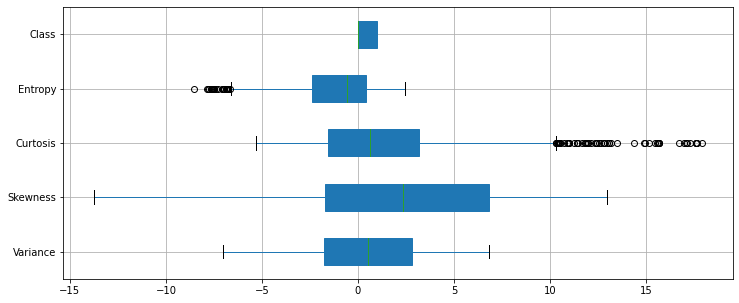

In [8]:
plt.figure(figsize=(12,5))
banknote.boxplot(patch_artist=True,vert=False)

##### Viz 1: Correlation Matrix along with Heatmap 

          Variance  Skewness  Curtosis  Entropy   Class
Variance    1.0000    0.2640   -0.3808   0.2768 -0.7248
Skewness    0.2640    1.0000   -0.7869  -0.5263 -0.4447
Curtosis   -0.3808   -0.7869    1.0000   0.3188  0.1559
Entropy     0.2768   -0.5263    0.3188   1.0000 -0.0234
Class      -0.7248   -0.4447    0.1559  -0.0234  1.0000


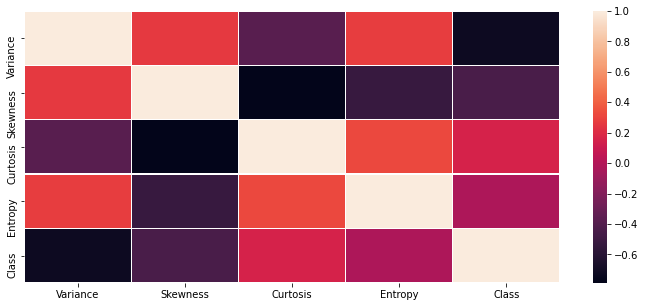

In [9]:
my_corr=banknote.corr()
print(my_corr)
plt.figure(figsize=(12,5))
sns.heatmap(my_corr,linewidth=0.5)
plt.show()

0    762
1    610
Name: Class, dtype: int64


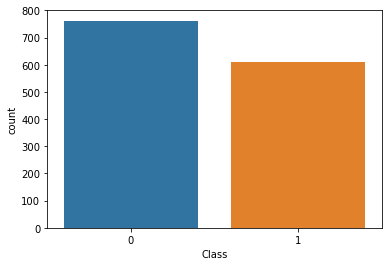

In [10]:
print(banknote['Class'].value_counts())
sns.countplot(x='Class',data=banknote)

##### in the above Bar graph I have tried to plot the count of  Genuine notes versus Forged notes.

##### Viz 2: In the below shown Pairplot shown we can see the regression plot for different features along different categories as per target variable. The blue dots represented by 0( i.e Defective Notes) and Orange Dots represented by 1 (i.e.Not a defective notes). The Entropy and variance features has positive regression line which says as entropy of the image of notes increases the variance will increase. Similar is for curtosis entropy. For others the slope of regression lines are negative. 

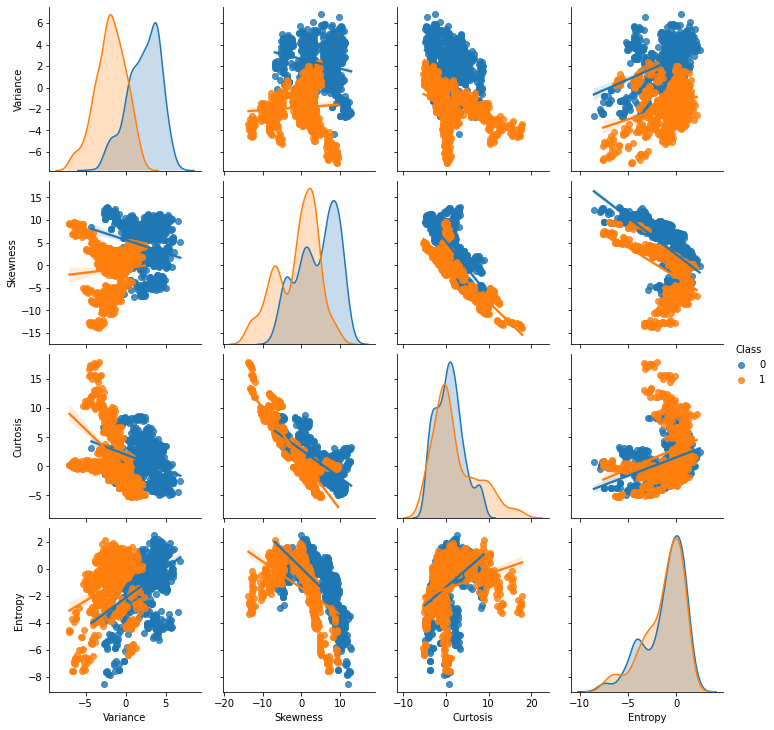

In [11]:
sns.pairplot(banknote, hue='Class',kind='reg') 
plt.show()

In [12]:
banknote.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

##### Splitting data into Traget and Predictor Variables & Knowing the Shape of the new variables

In [13]:
predictor_var= banknote[['Variance', 'Skewness', 'Curtosis', 'Entropy']] #all columns except the last one
target_var= banknote['Class'] #only the last column

In [14]:
print(predictor_var.shape)
print(target_var.shape)

(1372, 4)
(1372,)


##### Split the data into train and test sets.

In [15]:
from sklearn.model_selection import train_test_split 

**Now train_test_split will return 4 different parameters. We will name them:
X_trainset, X_testset, y_trainset, y_testset**

**The train_test_split will need the parameters:
X, y, test_size=0.3, and random_state=123.**

**The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.**

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(predictor_var,target_var, test_size=0.3, random_state=123)

##### Import Decision Tree Classifier and fit the model to the training data.



In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree = DecisionTreeClassifier(max_depth=3,max_features=4)

 ##### Inside of the classifier, specify criterion="gini" so we can see the information gain of each node.

In [19]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### Knowing the feature importances

In [20]:
tree.feature_importances_
pd.Series(tree.feature_importances_,index=predictor_var.columns).sort_values(ascending=False)

Variance   0.7481
Skewness   0.1922
Curtosis   0.0596
Entropy    0.0000
dtype: float64

In [21]:
predictions = tree.predict(X_test)

##### Check the top 5 predictions and actual values.

In [22]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions})
df.head(5)

,Actual,Predicted
657,0,0
18,0,0
700,0,0
221,0,0
1219,1,1


##### We see that the predictions are pretty accurate. Let's evaluate the prediction accuracy.



In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [24]:
accuracy_score(Y_test, predictions) #Calculate number of correctly classified observations.

0.9368932038834952

In [25]:
accuracy_score(Y_test, predictions, normalize=False)

386

##### We can see out of 412 datapoints only 26 are misclasified from the above accuracy score.


Let us Plot Confusion Metrix

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Class 0','Class 1'],columns=['Class 0','Class 1'])

         Class 0  Class 1
Class 0      222       11
Class 1       15      164


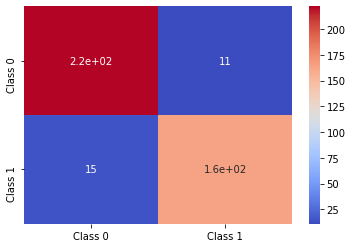

In [28]:
print(confusion_df)
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

In [29]:
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  222
False Positives:  11
False Negatives:  15
True Positives:  164


In [30]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       233
           1       0.94      0.92      0.93       179

    accuracy                           0.94       412
   macro avg       0.94      0.93      0.94       412
weighted avg       0.94      0.94      0.94       412



##### Specificity

In [31]:
Specificity = tn/(tn+fp)
print("The probability of predicting whether a bank note is authentic or fake",Specificity)

The probability of predicting whether a bank note is authentic or fake 0.9527896995708155


##### Sensitivity

In [32]:
Sensitivity = tp/(tp+fn)
print("The probability of predicting whether a bank note is authentic or fake correctly is",Sensitivity)

The probability of predicting whether a bank note is authentic or fake correctly is 0.9162011173184358


##### We can also visualize the tree output using graphviz



In [33]:
from sklearn.tree import export_graphviz
import graphviz

In [34]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=predictor_var.columns, out_file=None)

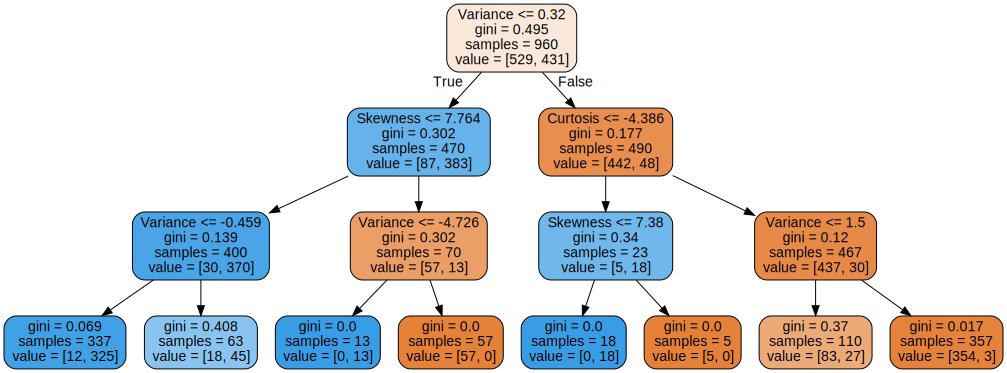

In [35]:
graphviz.Source(dot_data)

### Explaining Decision Tree for Classification:
In the above Decision tree every node is a condition and we are splitting values in a single feature. the condition is based on Imputity (Gini Impurity/Information gain(entropy)) for classification and variance for regression but as it a classificaton problem we will consider gini impurity as a criteria.
To start the tree I have computed feature importances i.e. how each feature contribute to decreasing weighted impurity. and on calculating the feature imnportance i found variance Feature contributes most and sonit appears as a root of this tree.

The everybox in decision tree tells how many samples at the node falls into each category.

We can see that the root node starts with 960 samples of two class(0 &1) with a gini index of 0.495. In this node the feature that best split the different class of data is Variance using threshold value of 0.32. This results in two decision nodes Skewness and Curtosis. the Skewness has gini index of 0.302 and out of 960 smaples 470 samples are trained with class values of (87,383) & The one with curtosis has Gini of 0.177 with 490 Samples out of which Class values are (442 & 48).

The Skewness and Curtosis is again distributed into two decision nodes i.e. Variances.

At the end we can see that Children nodes generated from variance which is one of the decision node.

The nodes whose Gini=0 are the leaves and seems the purest nodes.

### Using Grid Search and Cross-Validation

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

##### Let's use GridSearchCV to try max_depth values 3,4,5,None and 5,6,7 value for max_features hyperparameters. Specify 10 number of folds.



In [37]:
param_grid = [{"max_depth":[3, 4, 5, None], "max_features":[4,5,6,7]}]

In [38]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),param_grid = param_grid,cv=10)

##### Fit the training data



In [39]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=123,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [3, 4, 5, None],
                      

##### Print out all the hyperparameters combinations that the GridSearchCV has tried.



In [40]:
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': 5},
 {'max_depth': 3, 'max_features': 6},
 {'max_depth': 3, 'max_features': 7},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 5},
 {'max_depth': 4, 'max_features': 6},
 {'max_depth': 4, 'max_features': 7},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 5, 'max_features': 5},
 {'max_depth': 5, 'max_features': 6},
 {'max_depth': 5, 'max_features': 7},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': 5},
 {'max_depth': None, 'max_features': 6},
 {'max_depth': None, 'max_features': 7}]

##### Print best hyperparameters combination.



In [41]:
gs.best_params_

{'max_depth': None, 'max_features': 4}

##### Print the complete DecisionTree estimator.



In [42]:
gs.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

##### Applying the best estimator in decision tree & Predicting result

Inside of the classifier, specify criterion="gini" so we can see the information gain of each node.

In [43]:
tree = DecisionTreeClassifier(max_depth=None,max_features=4)

In [44]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### Make predictions for the test set.



In [45]:
predictions = tree.predict(X_test)

In [46]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions})
df.head(5)

,Actual,Predicted
657,0,0
18,0,0
700,0,0
221,0,0
1219,1,1


##### Calculate accuracy of prediction



In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [48]:
accuracy_score(Y_test, predictions)#Calculate number of correctly classified observations.

0.9854368932038835

In [49]:
accuracy_score(Y_test, predictions, normalize=False) 

406

##### Confusion Matrix

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Class 0','Class 1'],columns=['Class 0','Class 1'])

         Class 0  Class 1
Class 0      231        2
Class 1        4      175


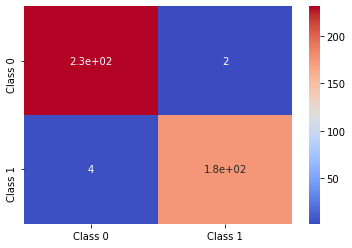

In [52]:
print(confusion_df)
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

##### We can see out of 412 datapoints only 6 are misclasified from the above accuracy score.


In [53]:
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  231
False Positives:  2
False Negatives:  4
True Positives:  175


In [54]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       233
           1       0.99      0.98      0.98       179

    accuracy                           0.99       412
   macro avg       0.99      0.98      0.99       412
weighted avg       0.99      0.99      0.99       412



F1 Score: Single metric that combines recall and precision using the harmonic mean. So closer the F1-Score for Class 0 & Class 1 is close to 1.

##### Specificity after Applying CV & GridSearch

In [55]:
Specificity = tn/(tn+fp) 
print("The probability of predicting whether a bank note is authentic or fake is:",Specificity)

The probability of predicting whether a bank note is authentic or fake is: 0.9914163090128756


##### Sensitivity after Applying CV & GridSearch

In [56]:
Sensitivity = tp/(tp+fn)
print("The probability of predicting whether a bank note is authentic or fake is:",Sensitivity)

The probability of predicting whether a bank note is authentic or fake is: 0.9776536312849162


##### Plotting decision Tree using Graphviz after selecting best hyperparameters that is obtained after Using GridSearch and CV 

In [57]:
from sklearn.tree import export_graphviz
import graphviz

In [58]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=predictor_var.columns, out_file=None)

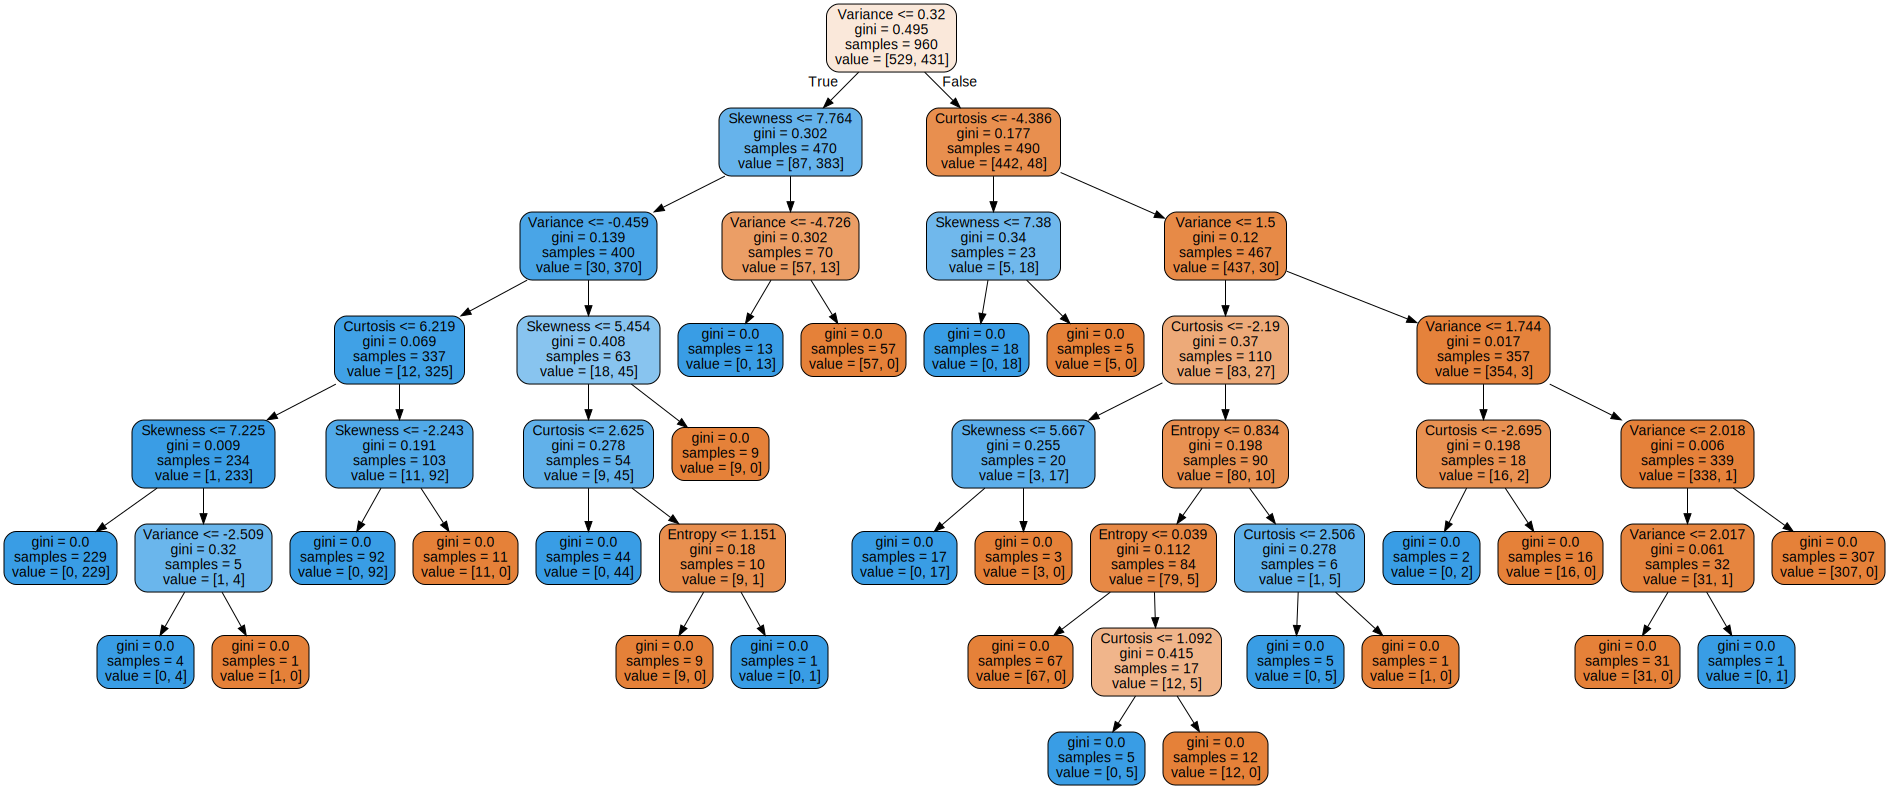

In [59]:
graphviz.Source(dot_data)

#### After Applying the best parameters with the help of Grid Search we see that the model accuracy score has improved. 

By looking at the below reference table we easy compare the results of Decision tree Model with and Without Pruning.

In [60]:
DT_Classifier=[['Max_Depth',3,'None'],['Max_Feature',4,4],['Accuracy Score',0.93,0.985],['f1 Score for Class0',0.94,0.99],['f1 Score for Class1',0.93,0.98],['Specificity',0.95,0.99],['Sensitivity',0.92,0.98],['Misclassified',26,6]]
Result_Summary2= pd.DataFrame(DT_Classifier, columns = ['Parameters','Without Grid Search','With Grid Search'])
Result_Summary2

,Parameters,Without Grid Search,With Grid Search
0,Max_Depth,3.0000,None
1,Max_Feature,4.0000,4
2,Accuracy Score,0.9300,0.9850
3,f1 Score for Class0,0.9400,0.9900
4,f1 Score for Class1,0.9300,0.9800
5,Specificity,0.9500,0.9900
6,Sensitivity,0.9200,0.9800
7,Misclassified,26.0000,6


References:
1. https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
2. https://webfocusinfocenter.informationbuilders.com/wfappent/TLs/TL_rstat/source/DecisionTree47.html
3. https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/

**Model  has 98.5 % Accuracy score after aplying Grid Search which is good but might be chance of Overfitting. This can be vizualized by plotting Decision_Boundary for being more sure about overfitting** 